11501568/11490434 [==============================] - 0s 0us/step
image size :  (28, 28)
image components :  [  0   0   0   0   0   0   0   0   0  14   1 154 253  90   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
train_images :  (60000, 784)
train_labels :  (60000, 10)
test_images :  (10000, 784)
test_labels :  (10000, 10)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 softmax (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.6724 - acc: 0.8341 - val_loss: 0.3824 - val_acc: 0.8984
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3625 - acc: 0.9013 - val_loss: 0.3180 -

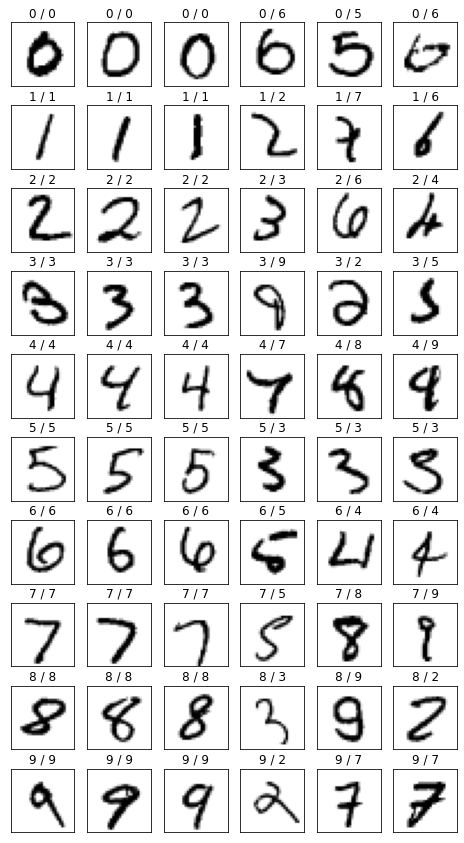

In [1]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("image size : ", train_images[0].shape)
print("image components : ", train_images[0][10])
# 0から1の浮動小数点の値に変換する
train_images = train_images.reshape(
                  (len(train_images), 28*28)).astype('float32') / 255
test_images = test_images.reshape(
                  (len(test_images), 28*28)).astype('float32') / 255
#正解ラベルの形式はワンホットベクトルに変換している
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)
print("train_images : ", train_images.shape)
print("train_labels : ", train_labels.shape)
print("test_images : ", test_images.shape)
print("test_labels : ", test_labels.shape)

#loss='categorical_crossentropy'
model_ce = models.Sequential()
model_ce.add(layers.Dense(10, activation='softmax', input_shape=(28*28,),
                       name='softmax'))
# 1層当たりのパラメータ数は 28*28(=784)と定数項bの785個だから総数は785*10=7850
model_ce.summary()

model_ce.compile(optimizer='adam', #最適化アルゴリズムにはadam optimizerを使用
              loss='categorical_crossentropy', #多項分類におけるクロスエントロピー
              metrics=['acc']) #モデルの性能評価は分類の正解率ACC

history = model_ce.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    batch_size=128, #(469-1)*128 + 96 = 60000
                    epochs=10)

p_val = model_ce.predict(np.array(test_images)); 
print(p_val.shape); print(p_val[0]); print(np.argmax(p_val[0]))

df = DataFrame({'pred': list(map(np.argmax, p_val)), #予測
                'label': list(map(np.argmax, test_labels))}) #正解ラベル
correct = df[df['pred']==df['label']]
incorrect = df[df['pred']!=df['label']]

fig = plt.figure(figsize=(8, 15))
for i in range(10):
    indices = list(correct[correct['pred']==i].index[:3]) \
                + list(incorrect[incorrect['pred']==i].index[:3])
    for c, image in enumerate(test_images[indices]):
        subplot = fig.add_subplot(10, 6, i*6+c+1)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.set_title('%d / %d' % (i, df['label'][indices[c]])) #左3つが正解、右3つが不正解
        subplot.imshow(image.reshape((28, 28)), #ベクトルから画像の行列に変換
                       vmin=0, vmax=1, cmap=plt.cm.gray_r) #再度0から1の間に変換

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 softmax (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0275 - acc: 0.8401 - val_loss: 0.0157 - val_acc: 0.9082
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0151 - acc: 0.9083 - val_loss: 0.0134 - val_acc: 0.9172
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0134 - acc: 0.9171 - val_loss: 0.0126 - val_acc: 0.9211
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0125 - acc: 0.9216 - val_loss: 0.0118 - val_acc: 0.9264
Epoch 5/10
469/469 [==============================] 

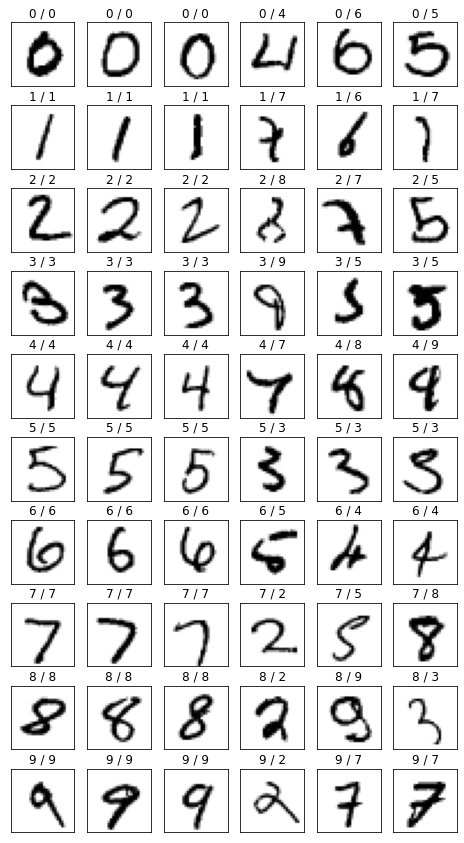

In [2]:
model_mse = models.Sequential()
model_mse.add(layers.Dense(10, activation='softmax', input_shape=(28*28,),
                       name='softmax'))
# 1層当たりのパラメータ数は 28*28(=784)と定数項bの785個だから総数は785*10=7850
model_mse.summary()

model_mse.compile(optimizer='adam', #最適化アルゴリズムにはadam optimizerを使用
              loss='mse', #MSE
              metrics=['acc']) #モデルの性能評価は分類の正解率ACC

history = model_mse.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    batch_size=128, #(469-1)*128 + 96 = 60000
                    epochs=10)

p_val = model_mse.predict(np.array(test_images)); 
print(p_val.shape); print(p_val[0]); print(np.argmax(p_val[0]))

df = DataFrame({'pred': list(map(np.argmax, p_val)), #予測
                'label': list(map(np.argmax, test_labels))}) #正解ラベル
correct = df[df['pred']==df['label']]
incorrect = df[df['pred']!=df['label']]

fig = plt.figure(figsize=(8, 15))
for i in range(10):
    indices = list(correct[correct['pred']==i].index[:3]) \
                + list(incorrect[incorrect['pred']==i].index[:3])
    for c, image in enumerate(test_images[indices]):
        subplot = fig.add_subplot(10, 6, i*6+c+1)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.set_title('%d / %d' % (i, df['label'][indices[c]])) #左3つが正解、右3つが不正解
        subplot.imshow(image.reshape((28, 28)), #ベクトルから画像の行列に変換
                       vmin=0, vmax=1, cmap=plt.cm.gray_r) #再度0から1の間に変換